# **Importação de Bibliotecas Necessárias**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import joblib


# **Carregamento dos dados**



In [39]:
df = pd.read_csv('desafio_indicium_imdb.csv')

# **Tratamento de Dados**





## **Remoção de Colunas e Conversão de Tipos**

In [40]:
df = df.drop(columns=['Unnamed: 0'])

df['Gross'] = df['Gross'].str.replace(',', '').astype(float, errors='ignore')

df = df[df['Released_Year'] != 'PG']

df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

## **Remoção de Colunas e Conversão de Tipos**

In [41]:
df.dropna(subset=['Certificate', 'Gross'], inplace=True)

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

df = df.dropna(subset=['Released_Year'])

# **Vizualização dos dados**

In [42]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Giù la testa,1971,PG,157.0,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690.0
990,Kelly's Heroes,1970,GP,144.0,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435.0
991,The Jungle Book,1967,U,78.0,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612.0
993,A Hard Day's Night,1964,U,87.0,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0


In [43]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'R', 'G', 'Passed', 'PG-13', 'PG', 'Unrated', 'GP',
       'Approved', 'TV-PG', 'U/A'], dtype=object)

In [44]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 996
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   783 non-null    object 
 1   Released_Year  783 non-null    int64  
 2   Certificate    783 non-null    object 
 3   Runtime        783 non-null    float64
 4   Genre          783 non-null    object 
 5   IMDB_Rating    783 non-null    float64
 6   Overview       783 non-null    object 
 7   Meta_score     712 non-null    float64
 8   Director       783 non-null    object 
 9   Star1          783 non-null    object 
 10  Star2          783 non-null    object 
 11  Star3          783 non-null    object 
 12  Star4          783 non-null    object 
 13  No_of_Votes    783 non-null    int64  
 14  Gross          783 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 97.9+ KB


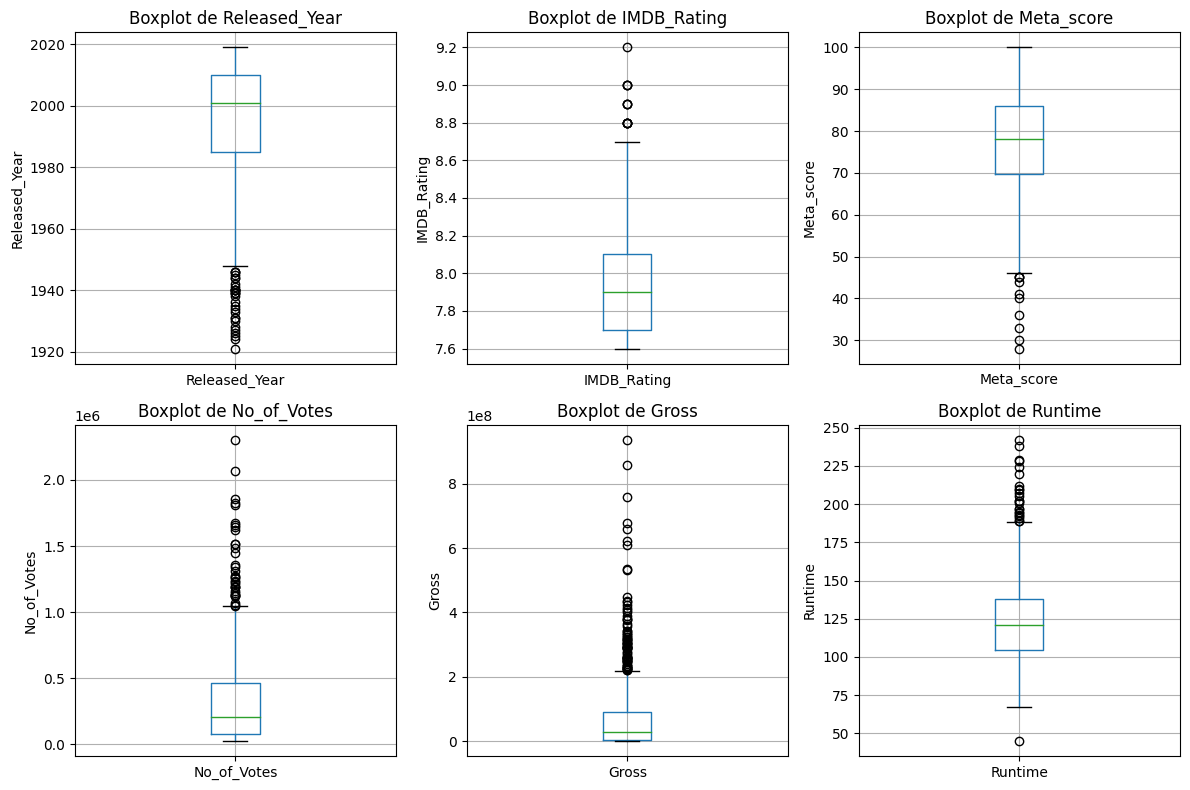

In [46]:
atributos = ['Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']

plt.figure(figsize=(12, 8))
for i, col in enumerate(atributos, 1):
    plt.subplot(2, 3, i)
    df.boxplot(column=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [47]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,783.000000,783.000000,783.000000,712.000000,7.830000e+02,7.830000e+02
mean,1994.840358,124.574713,7.947126,77.154494,3.276476e+05,7.173251e+07
std,20.230989,27.460117,0.283545,12.418115,3.406533e+05,1.118206e+08
min,1921.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1985.000000,104.500000,7.700000,69.750000,7.897700e+04,4.360000e+06
50%,2001.000000,121.000000,7.900000,78.000000,2.034630e+05,2.683000e+07
75%,2010.000000,138.000000,8.100000,86.000000,4.655965e+05,9.063044e+07
max,2019.000000,242.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


In [48]:
df.isnull().sum()

Series_Title      0
Released_Year     0
Certificate       0
Runtime           0
Genre             0
IMDB_Rating       0
Overview          0
Meta_score       71
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
dtype: int64

# **Análise Exploratória**

In [49]:
media_duracao = df['Runtime'].mean()
mediana_duracao = df['Runtime'].median()
desvio_padrao_duracao = df['Runtime'].std()

print(f'Média de duração dos filmes: {media_duracao:.2f} minutos')
print(f'Mediana de duração dos filmes: {mediana_duracao:.2f} minutos')
print(f'Desvio padrão de duração dos filmes: {desvio_padrao_duracao:.2f} minutos')

Média de duração dos filmes: 124.57 minutos
Mediana de duração dos filmes: 121.00 minutos
Desvio padrão de duração dos filmes: 27.46 minutos


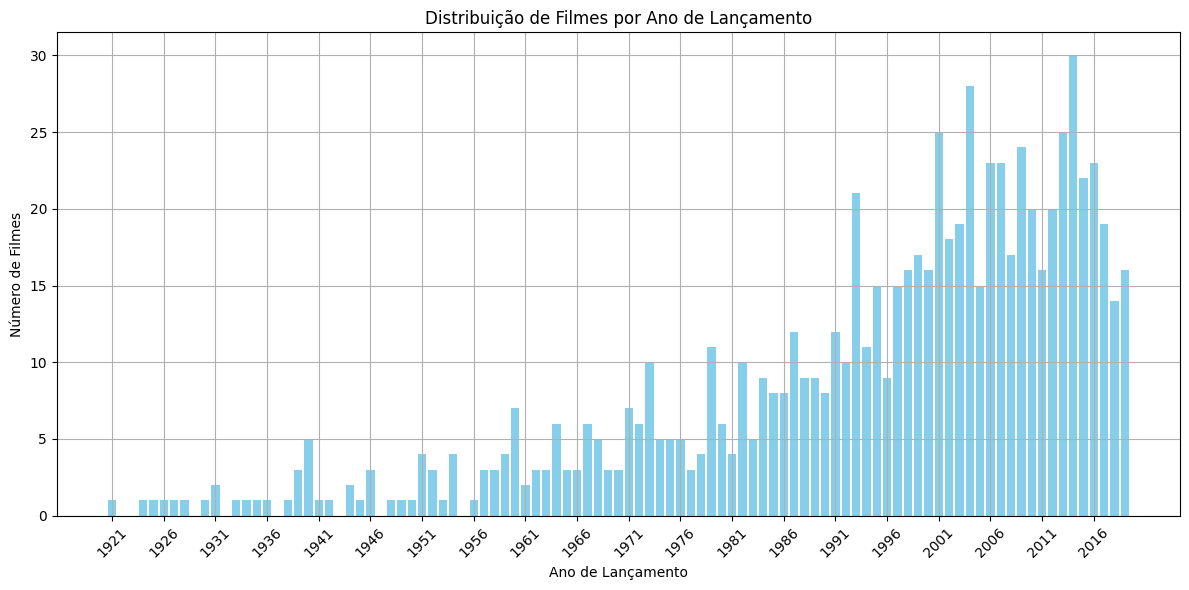

In [50]:
ano_lancamento_counts = df['Released_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(ano_lancamento_counts.index.astype(int), ano_lancamento_counts.values, color='skyblue')
plt.title('Distribuição de Filmes por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Filmes')

plt.xticks(ano_lancamento_counts.index.astype(int), rotation=45)
plt.xticks(range(min(ano_lancamento_counts.index.astype(int)), max(ano_lancamento_counts.index.astype(int))+1, 5))

plt.grid(True)
plt.tight_layout()

plt.show()



*   A análise do número de lançamentos ao longo dos anos revela picos notáveis nas décadas de 1980 e 1990.

*   Um aumento significativo é observado nos anos 2000, refletindo o crescimento da produção cinematográfica.

*   O número de lançamentos diminui após 2010, possivelmente devido a mudanças na indústria, como o advento do streaming.




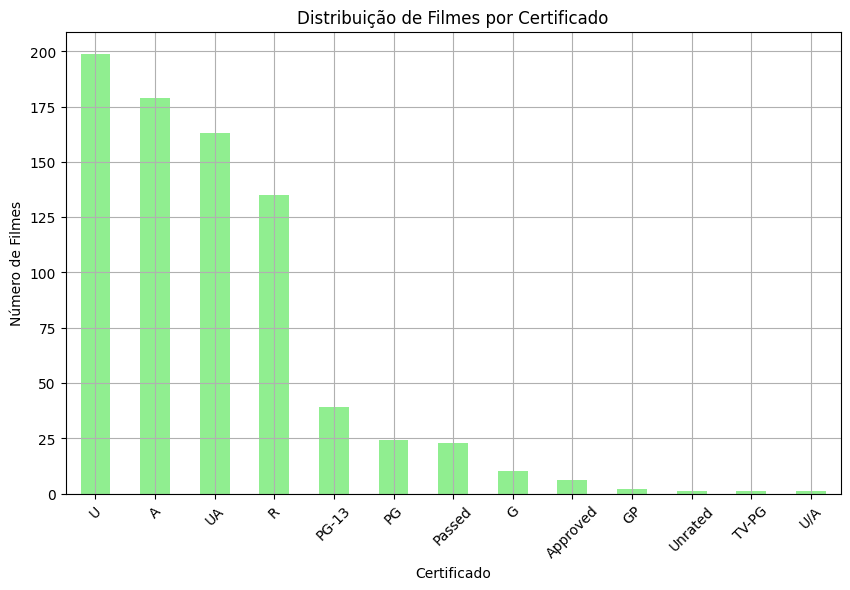

In [51]:
certificado_counts = df['Certificate'].value_counts()

plt.figure(figsize=(10, 6))
certificado_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribuição de Filmes por Certificado')
plt.xlabel('Certificado')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



*   A maioria dos filmes possui certificação "U", seguida por "A", "UA" e "R".
*   As certificação menos comum, são parecidas com as mais comuns visto que são classificações usadas para países específicos.





A - Adult: Restrito a adultos. Este selo é usado principalmente na Índia.

UA - Unrestricted Public Exhibition – But With Parental Guidance: Permite menores de 12 anos, desde que acompanhados por um adulto. Usado na Índia.

U - Unrestricted Public Exhibition: Adequado para todos os públicos. Usado na Índia.

R - Restricted: Menores de 17 anos precisam estar acompanhados por um adulto. Usado nos EUA.

G - General Audiences: Adequado para todos os públicos. Usado nos EUA.

Passed - Este termo foi usado no início da era do cinema americano para indicar que o filme foi aprovado pelo sistema de censura do Motion Picture Production Code (Hays Code).

PG-13 - Parents Strongly Cautioned: Alguns materiais podem ser inapropriados para menores de 13 anos. Usado nos EUA.

PG - Parental Guidance Suggested: Alguns materiais podem ser inapropriados para crianças. Usado nos EUA.

Unrated - Filme que não foi submetido ao processo de classificação indicativa. Pode conter qualquer tipo de conteúdo.

GP - General audiences, Parental guidance: Usado brevemente nos EUA no início dos anos 70, equivalente ao PG.

Approved - Indica que o filme foi aprovado pelo Motion Picture Production Code. Similar ao "Passed".

TV-PG - Parental Guidance Suggested for TV: Alguns materiais podem ser inapropriados para crianças. Usado para programas de televisão nos EUA.

U/A - Unrestricted Public Exhibition – But With Parental Guidance: Similar ao "UA", usado na Índia.

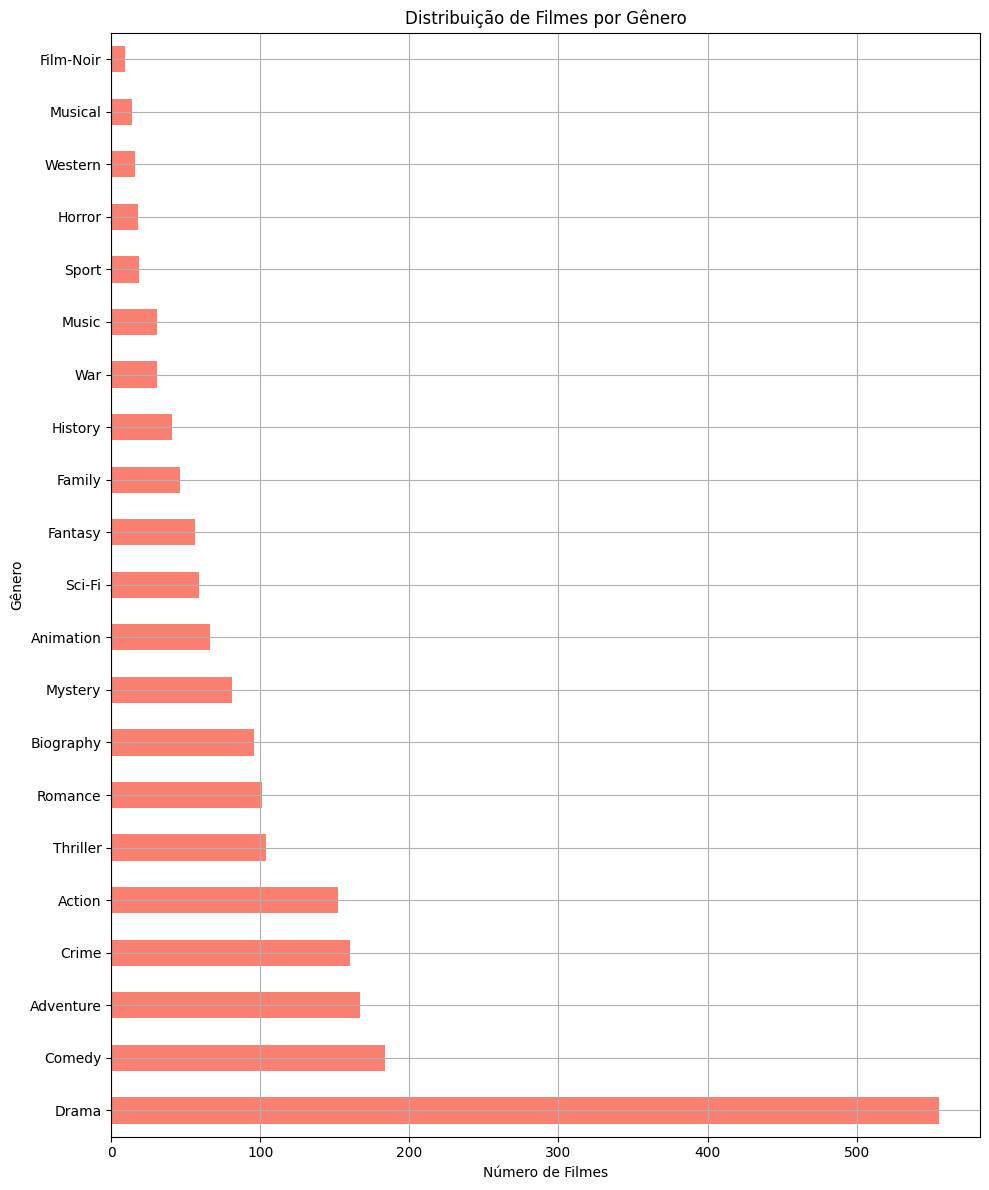

In [52]:
genero_separado = df['Genre'].str.split(', ')

genero_todos = []
for generos in genero_separado:
    genero_todos.extend(generos)

genero_counts = pd.Series(genero_todos).value_counts()

plt.figure(figsize=(10, 12))
genero_counts.plot(kind='barh', color='salmon')
plt.title('Distribuição de Filmes por Gênero')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.grid(True)

plt.tick_params(axis='y', which='major', labelsize=10)

plt.tight_layout()
plt.show()



*   Gêneros mais comuns incluem Drama, Comédia e Aventura.

*   Gêneros menos representados são Film-Noir, Musical e Velho oeste, indicando uma menor produção nestes nichos.



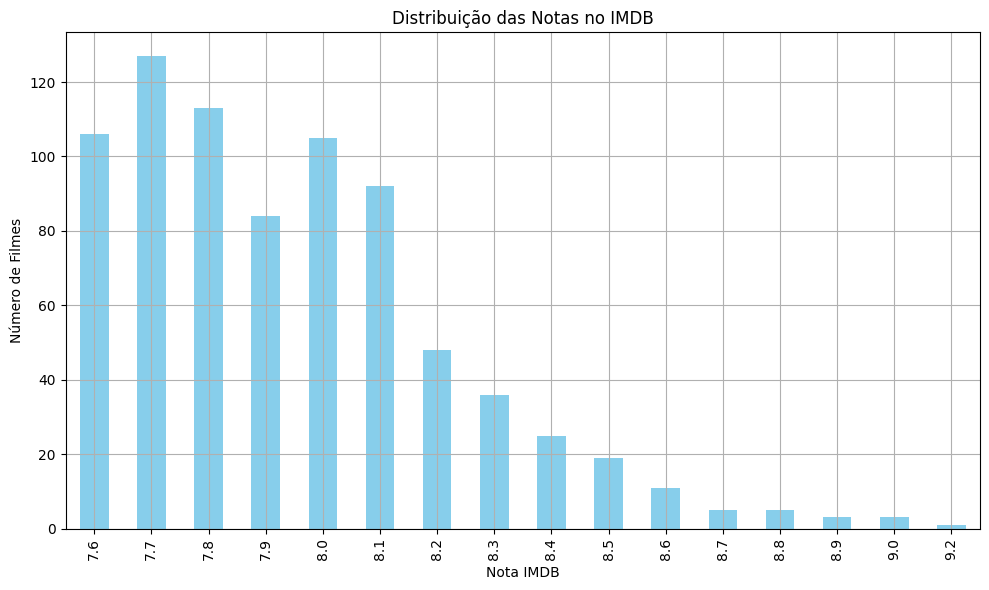

In [53]:
imdb_rating_counts = df['IMDB_Rating'].dropna().value_counts().sort_index()
plt.figure(figsize=(10, 6))
imdb_rating_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Nota IMDB')
plt.ylabel('Número de Filmes')
plt.title('Distribuição das Notas no IMDB')
plt.grid(True)

plt.tight_layout()
plt.show()



*   A maioria dos filmes possui classificações IMDb entre 7.6 e 8.1.

*   Filmes com classificações acima de 9.0 são raros, sugerindo que poucos filmes alcançam excelência crítica.



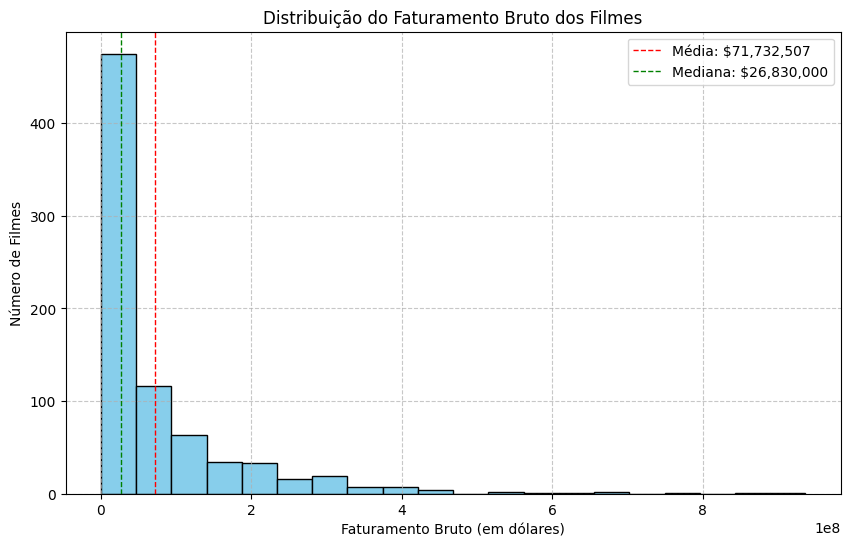

In [54]:
mean_gross = df['Gross'].mean()
median_gross = df['Gross'].median()

plt.figure(figsize=(10, 6))
plt.hist(df['Gross'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_gross, color='red', linestyle='dashed', linewidth=1, label=f'Média: ${mean_gross:,.0f}')
plt.axvline(median_gross, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: ${median_gross:,.0f}')
plt.xlabel('Faturamento Bruto (em dólares)')
plt.ylabel('Número de Filmes')
plt.title('Distribuição do Faturamento Bruto dos Filmes')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

* A distribuição do faturamento bruto é altamente assimétrica, com a maioria dos filmes gerando faturamento baixo.
* A média é **71,732,507**, enquanto a mediana é **26,830,000**. A diferença significativa indica a presença de valores atípicos (outliers) altos.
* A maioria dos filmes está na faixa de faturamento bruto inferior a $100 milhões.
* A distribuição é influenciada por alguns filmes com faturamentos extremamente altos.

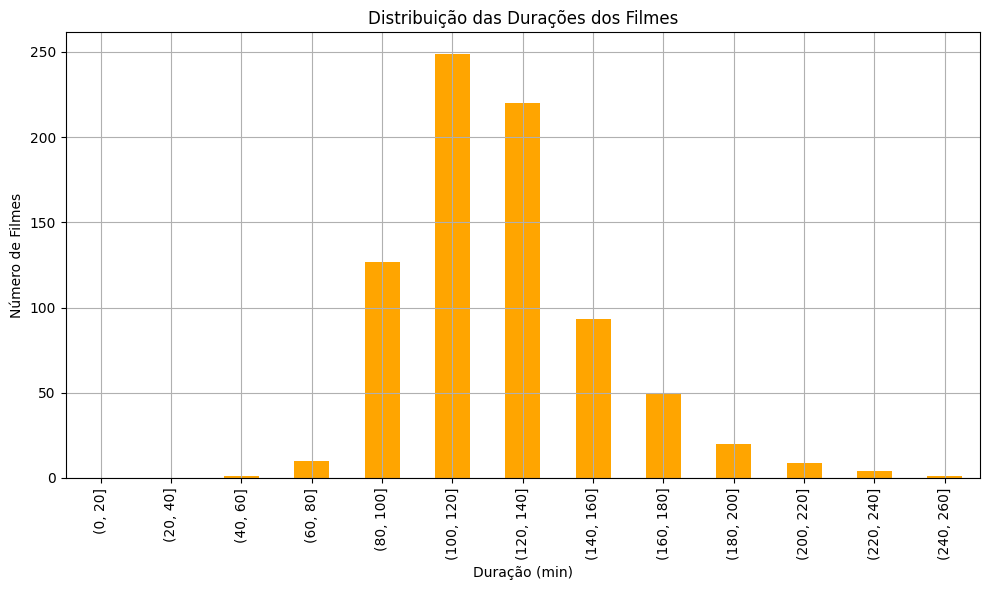

In [55]:
bins = range(0, int(df['Runtime'].max()) + 20, 20)
runtime_bins = pd.cut(df['Runtime'], bins=bins)

runtime_counts = runtime_bins.value_counts().sort_index()

plt.figure(figsize=(10, 6))
runtime_counts.plot(kind='bar', color='orange')
plt.xlabel('Duração (min)')
plt.ylabel('Número de Filmes')
plt.title('Distribuição das Durações dos Filmes')
plt.grid(True)

plt.tight_layout()
plt.show()



*   A duração dos filmes varia amplamente, com a maioria dos filmes entre 80 e 140 minutos.

*   Filmes com mais de 150 minutos são menos comuns, indicando que a maioria das produções opta por uma duração mais acessível ao público geral.



In [56]:
diretores_counts = df['Director'].value_counts().head(10)
print('Diretores mais produtivo:')
print(diretores_counts)

Diretores mais produtivo:
Steven Spielberg     13
Martin Scorsese      10
Alfred Hitchcock      9
Woody Allen           8
Quentin Tarantino     8
David Fincher         8
Clint Eastwood        8
Christopher Nolan     8
Rob Reiner            7
Hayao Miyazaki        7
Name: Director, dtype: int64


In [57]:
atores_principais = ['Star1', 'Star2', 'Star3', 'Star4']

for ator in atores_principais:
    ator_counts = df[ator].value_counts()
    print(f'\nFrequência de {ator}:')
    print(ator_counts.head(10))



Frequência de Star1:
Tom Hanks            11
Robert De Niro       11
Al Pacino            10
Clint Eastwood       10
Leonardo DiCaprio     9
Johnny Depp           8
Christian Bale        8
Denzel Washington     7
Tom Cruise            6
Jake Gyllenhaal       6
Name: Star1, dtype: int64

Frequência de Star2:
Emma Watson          7
Matt Damon           5
Ian McKellen         4
Julie Delpy          4
Chris Evans          4
Kate Winslet         4
Meryl Streep         4
Brad Pitt            4
Ed Harris            4
Robert Downey Jr.    3
Name: Star2, dtype: int64

Frequência de Star3:
Rupert Grint          5
Joe Pesci             4
Carrie Fisher         4
Jennifer Connelly     4
John Goodman          4
Scarlett Johansson    4
Rachel McAdams        4
Samuel L. Jackson     4
Edward Norton         3
Michael Madsen        3
Name: Star3, dtype: int64

Frequência de Star4:
Michael Caine             4
Mark Ruffalo              3
Catherine Keener          3
Bill Nighy                2
Bryce Dallas

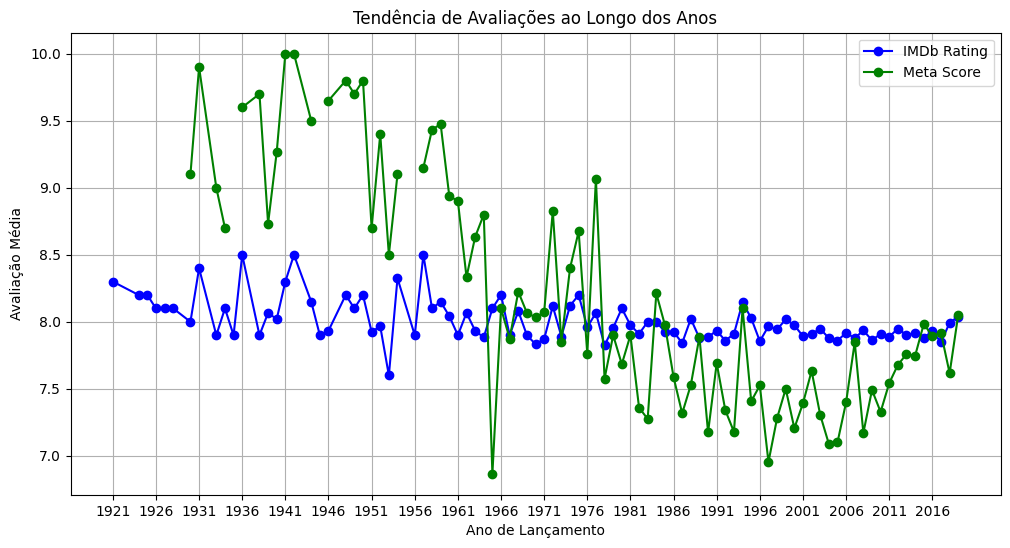

In [58]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df = df.dropna(subset=['Released_Year'])

avaliacoes_por_ano = df.groupby('Released_Year').agg({'IMDB_Rating': 'mean', 'Meta_score': 'mean'}).reset_index()

avaliacoes_por_ano['Meta_score_normalizado'] = (avaliacoes_por_ano['Meta_score'] / 10)

plt.figure(figsize=(12, 6))
plt.plot(avaliacoes_por_ano['Released_Year'], avaliacoes_por_ano['IMDB_Rating'], marker='o', linestyle='-', color='blue', label='IMDb Rating')
plt.plot(avaliacoes_por_ano['Released_Year'], avaliacoes_por_ano['Meta_score_normalizado'], marker='o', linestyle='-', color='green', label='Meta Score')
plt.title('Tendência de Avaliações ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação Média')
plt.grid(True)
plt.legend()
plt.xticks(range(int(min(avaliacoes_por_ano['Released_Year'])), int(max(avaliacoes_por_ano['Released_Year']))+1, 5))
plt.show()


**Sobre o IMDb**
* **Detalhe:** Picos nas décadas de 1930 e 1950.
* **Estabilidade:** Após 1960, as avaliações médias se estabilizam entre 7.8 e 8.0.

**Sobre o Meta Score**
* **Observação Principal:** Declínio contínuo nos Meta Scores desde as décadas de 1930 e 1940.
* **Detalhe:** Estabilização em níveis mais baixos a partir da década de 1980.
* **Recente:** Ligeira recuperação nos Meta Scores nos últimos anos, mas não aos níveis iniciais.

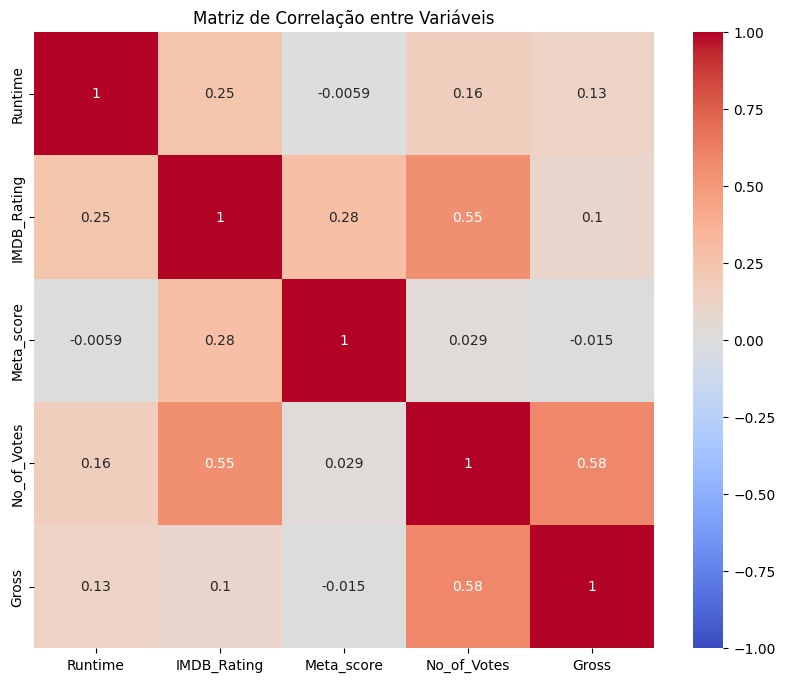

In [59]:
df['Gross'] = df['Gross'].replace({',': ''}, regex=True).astype(float)

correlation_matrix = df[['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

## **Principais fatores que estão relacionados com alta expectativa de faturamento de um filme de acordo com a matriz de correlação**

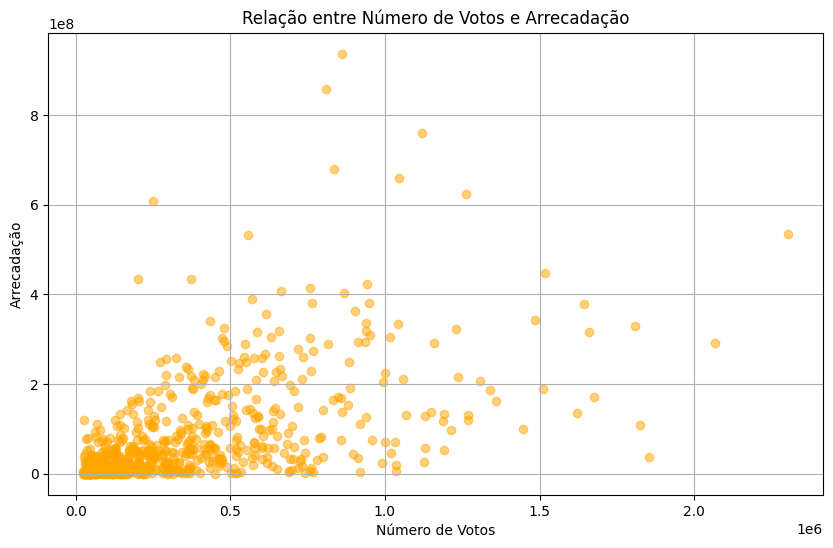

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(df['No_of_Votes'], df['Gross'], alpha=0.5, color='orange')
plt.title('Relação entre Número de Votos e Arrecadação')
plt.xlabel('Número de Votos')
plt.ylabel('Arrecadação')
plt.grid(True)
plt.show()


* **Correlação Positiva:** Há uma tendência de que filmes com maior número de votos tendem a ter maior arrecadação.
* **Densidade de Dados:** A maioria dos filmes tem menos de 500 mil votos e arrecadação inferior a $2 bilhões.
* **Outliers:** Existem alguns filmes com votos e arrecadações extremamente altos, que se destacam no gráfico.

## **Análise sobre possivel filme de sucesso**

In [61]:
df['Success'] = np.where((df['IMDB_Rating'] >= 8) & (df['No_of_Votes'] >= 100000), 1, 0)

scaler = StandardScaler()
df['Runtime_scaled'] = scaler.fit_transform(df[['Runtime']])

def encontrar_filme_de_sucesso(df_sucesso, scaler):

    genero = df_sucesso['Genre'].mode()[0]
    runtime_mode = df_sucesso['Runtime'].mode()[0]
    diretor = df_sucesso['Director'].mode()[0]
    estrela1 = df_sucesso['Star1'].mode()[0]
    estrela2 = df_sucesso['Star2'].mode()[0]
    estrela3 = df_sucesso['Star3'].mode()[0]
    estrela4 = df_sucesso['Star4'].mode()[0]

    return {
        'Gênero': genero,
        'Runtime': runtime_mode,
        'Diretor': diretor,
        'Estrela1': estrela1,
        'Estrela2': estrela2,
        'Estrela3': estrela3,
        'Estrela4': estrela4
    }

df_sucesso = df[df['Success'] == 1]

caracteristicas_sucesso = encontrar_filme_de_sucesso(df_sucesso, scaler)
print(f"O próximo filme de sucesso deve ser do gênero {caracteristicas_sucesso['Gênero']}, com {caracteristicas_sucesso['Runtime']} minutos, dirigido por {caracteristicas_sucesso['Diretor']} e estrelado por {caracteristicas_sucesso['Estrela1']}, {caracteristicas_sucesso['Estrela2']}, {caracteristicas_sucesso['Estrela3']} e {caracteristicas_sucesso['Estrela4']}.\n")

print(f"\033[1mExplicação detalhada:\033[0m\n")
print(f"\033[1mO gênero mais comum entre os filmes de sucesso é {caracteristicas_sucesso['Gênero']}.\033[0m \nIsso indica que filmes desse gênero têm maior probabilidade de serem bem recebidos pelo público.\n")
print(f"\033[1mA moda da duração dos filmes de sucesso é {caracteristicas_sucesso['Runtime']} minutos.\033[0m \nIsso sugere que uma duração próxima a essa moda pode ser ideal para manter o interesse do público.\n")
print(f"\033[1mO diretor mais comum entre os filmes de sucesso é {caracteristicas_sucesso['Diretor']}.\033[0m \nDiretores renomados ou com um histórico de sucesso tendem a atrair mais espectadores e obter melhores avaliações.\n")
print(f"\033[1mOs atores mais comuns entre os filmes de sucesso são: {caracteristicas_sucesso['Estrela1']}, {caracteristicas_sucesso['Estrela2']}, {caracteristicas_sucesso['Estrela3']} e {caracteristicas_sucesso['Estrela4']}.\033[0m \nA presença de atores reconhecidos e talentosos geralmente contribui para o sucesso de um filme, pois eles trazem consigo uma base de fãs estabelecida e garantem performances de alta qualidade.")


O próximo filme de sucesso deve ser do gênero Drama, com 117.0 minutos, dirigido por Christopher Nolan e estrelado por Leonardo DiCaprio, Harrison Ford, Carrie Fisher e Billy Dee Williams.

Explicação detalhada:

O gênero mais comum entre os filmes de sucesso é Drama. 
Isso indica que filmes desse gênero têm maior probabilidade de serem bem recebidos pelo público.

A moda da duração dos filmes de sucesso é 117.0 minutos. 
Isso sugere que uma duração próxima a essa moda pode ser ideal para manter o interesse do público.

O diretor mais comum entre os filmes de sucesso é Christopher Nolan. 
Diretores renomados ou com um histórico de sucesso tendem a atrair mais espectadores e obter melhores avaliações.

Os atores mais comuns entre os filmes de sucesso são: Leonardo DiCaprio, Harrison Ford, Carrie Fisher e Billy Dee Williams. 
A presença de atores reconhecidos e talentosos geralmente contribui para o sucesso de um filme, pois eles trazem consigo uma base de fãs estabelecida e garantem per

## **Recomendação de filme**

In [62]:
df['Success'] = np.where((df['IMDB_Rating'] >= 8) & (df['No_of_Votes'] >= 100000), 1, 0)

def encontrar_filme_de_sucesso(df_sucesso):
    genero = df_sucesso['Genre'].mode()[0]
    runtime = df_sucesso['Runtime'].mean()
    diretor = df_sucesso['Director'].mode()[0]
    estrela1 = df_sucesso['Star1'].mode()[0]
    estrela2 = df_sucesso['Star2'].mode()[0]
    estrela3 = df_sucesso['Star3'].mode()[0]
    estrela4 = df_sucesso['Star4'].mode()[0]
    meta_score = df_sucesso['Meta_score'].mean()
    overview = " ".join(df_sucesso['Overview'].values)

    return {
        'Gênero': genero,
        'Runtime': runtime,
        'Diretor': diretor,
        'Estrela1': estrela1,
        'Estrela2': estrela2,
        'Estrela3': estrela3,
        'Estrela4': estrela4,
        'Meta_score': meta_score,
        'Overview': overview
    }

df_sucesso = df[df['Success'] == 1]

caracteristicas_sucesso = encontrar_filme_de_sucesso(df_sucesso)

def recomendar_filme(df, caracteristicas_sucesso):

    df['similaridade'] = (
        (df['Genre'] == caracteristicas_sucesso['Gênero']).astype(int) +
        (df['Director'] == caracteristicas_sucesso['Diretor']).astype(int) +
        (df['Star1'] == caracteristicas_sucesso['Estrela1']).astype(int) +
        (df['Star2'] == caracteristicas_sucesso['Estrela2']).astype(int) +
        (df['Star3'] == caracteristicas_sucesso['Estrela3']).astype(int) +
        (df['Star4'] == caracteristicas_sucesso['Estrela4']).astype(int) +
        (df['Meta_score'] - caracteristicas_sucesso['Meta_score']).abs()
    )

    filme_recomendado = df.loc[df['similaridade'].idxmax()]

    return filme_recomendado['Series_Title']

filme_recomendado = recomendar_filme(df, caracteristicas_sucesso)
print(f"Recomendação de filme: {filme_recomendado}")


print("\nExplicação detalhada:\n")
print(f"\033[1mO gênero mais comum entre os filmes de sucesso é {caracteristicas_sucesso['Gênero']}.\033[0m\n")
print(f"\033[1mA média de duração dos filmes de sucesso é {caracteristicas_sucesso['Runtime']:.2f} minutos.\033[0m\n")
print(f"\033[1mO diretor mais comum entre os filmes de sucesso é {caracteristicas_sucesso['Diretor']}.\033[0m\n")
print(f"\033[1mOs atores mais comuns entre os filmes de sucesso são {caracteristicas_sucesso['Estrela1']}, {caracteristicas_sucesso['Estrela2']}, {caracteristicas_sucesso['Estrela3']} e {caracteristicas_sucesso['Estrela4']}.\033[0m\n")
print(f"\033[1mA média das críticas (Meta_score) dos filmes de sucesso é {caracteristicas_sucesso['Meta_score']:.2f}.\033[0m\n")

Recomendação de filme: I Am Sam

Explicação detalhada:

O gênero mais comum entre os filmes de sucesso é Drama.

A média de duração dos filmes de sucesso é 130.76 minutos.

O diretor mais comum entre os filmes de sucesso é Christopher Nolan.

Os atores mais comuns entre os filmes de sucesso são Leonardo DiCaprio, Harrison Ford, Carrie Fisher e Billy Dee Williams.

A média das críticas (Meta_score) dos filmes de sucesso é 80.56.



In [63]:
df.loc[df['Series_Title'] == 'I Am Sam']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Success,Runtime_scaled,similaridade
787,I Am Sam,2001,PG-13,132.0,Drama,7.7,A mentally handicapped man fights for custody ...,28.0,Jessie Nelson,Sean Penn,Michelle Pfeiffer,Dakota Fanning,Dianne Wiest,142863,40311852.0,0,0.270575,53.560484


## **Insights com a coluna Overview**

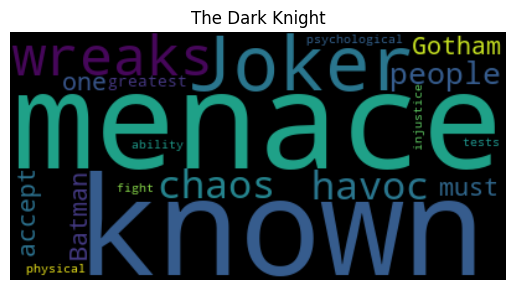

In [64]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = df['Overview'][1]

wordcloud = WordCloud().generate(text)

plt.title(df['Series_Title'][1])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Depois de plotar a word cloud, o próximo passo para inferir o gênero é:

1. **Pré-processamento de Texto:**

- Remova stopwords, pontuação e caracteres irrelevantes do texto.
- Tokenize o texto, dividindo-o em palavras individuais.
- Aplique lematização ou stemming para reduzir as palavras à sua forma base.

2. **Extração de Características:**

- Utilize técnicas como TF-IDF (Term Frequency-Inverse Document Frequency) para converter o texto em vetores numéricos que representam a importância das palavras no contexto do texto.

3. **Treinamento de Modelo:**

- Treine um modelo de aprendizado de máquina (como Naive Bayes, SVM, ou Random Forest) usando um conjunto de dados rotulado com sinopses de filmes e seus gêneros correspondentes.

4. **Inferência:**

- Aplique o modelo treinado nas novas sinopses para prever os gêneros dos filmes.

Esse processo ajudará a automatizar a classificação de gêneros de filmes com base em suas descrições.

In [65]:
for i, genre in enumerate(df['Genre'].apply(lambda x: x.split(',')[0]).values):
    if genre.lower() in df['Overview'].to_list()[i].lower():
        print(f'Genero: {genre} | Sinopse: {df["Overview"].to_list()[i]}')

Genero: Crime | Sinopse: An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
Genero: Crime | Sinopse: The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.
Genero: Crime | Sinopse: In Gotham City, mentally troubled comedian Arthur Fleck is disregarded and mistreated by society. He then embarks on a downward spiral of revolution and bloody crime. This path brings him face-to-face with his alter-ego: the Joker.
Genero: Action | Sinopse: After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe.
Genero: Crime | Sinopse: A series of mysterious events change the life of a blind pianist, who must now report a crime that he should technically know nothing of.

- Filmes de crime frequentemente mencionam diretamente elementos criminosos na sinopse, indicando uma forte correspondência entre o gênero e a descrição do filme.

- Exemplo: "The Godfather" menciona "organized crime dynasty" na sinopse, alinhando-se diretamente com o gênero Crime.

- Sendo assim, geralmente é possível inferir o gênero crime a partir da coluna Overview 

# **Modelo de previsão da nota do imdb**





In [66]:
df = df.dropna(subset=['IMDB_Rating', 'No_of_Votes', 'Runtime', 'Gross'])

X = df[['No_of_Votes', 'Runtime', 'Gross']]
y = df['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(f"{X.shape}")
# print(f"{y.shape}")
# Treinamento do modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

joblib.dump(reg_model, 'modelo_imdb_linear_regression.pkl')

y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100


# print(
#     np.concatenate((
#         y_pred.reshape(len(y_pred), 1),
#         y_test.values.reshape(len(y_test), 1)
#     ),axis=1)
# )

print(f"MSE do modelo de previsão de nota do IMDB: {mse}")
print(f"MAE do modelo de previsão de nota do IMDB: {mae}")
print(f"R² do modelo de previsão de nota do IMDB: {r2}")
print(f"MAPE do modelo de previsão de nota do IMDB: {mape}%")



MSE do modelo de previsão de nota do IMDB: 0.04768891025747252
MAE do modelo de previsão de nota do IMDB: 0.17859562187558198
R² do modelo de previsão de nota do IMDB: 0.3986494628766797
MAPE do modelo de previsão de nota do IMDB: 2.2500865675030273%


Estamos resolvendo um problema de regressão, onde o objetivo é prever uma variável contínua (nota do IMDb) com base em outras variáveis.

**Variáveis e Transformações Utilizadas:** Gross, Runtime, No_of_Votes pois possuem maior correlação com IMDB

**Modelo Utilizado:** Regressão Linear

**Prós:**

**Simplicidade:** Fácil de entender e interpretar.

**Rápido:** Treinamento e previsão rápidos, mesmo em grandes conjuntos de dados.

**Menos Susceptível ao Overfitting:** Com um número limitado de variáveis, é menos provável que o modelo superajuste os dados.

**Contras:**

**Assume Linearidade:** Assume que há uma relação linear entre as variáveis independentes e a variável dependente.

**Sensível a Outliers:** Outliers podem afetar significativamente a performance do modelo.

**Pode não capturar Interações Complexas:** Não consegue modelar interações não lineares entre variáveis.

**Medida de Performance**

* **Erro Quadrático Médio (MSE):** Mede a média dos quadrados dos erros, ou seja, a diferença entre os valores previstos e os valores reais.

* **Erro Absoluto Médio (MAE):** Mede a média dos valores absolutos dos erros, ou seja, a diferença absoluta entre os valores previstos e os valores reais.

* **R² (Coeficiente de Determinação):** Mede a proporção da variância na variável dependente que é previsível a partir das variáveis independentes.

* **MAPE (Erro Absoluto Percentual Médio):** Mede a precisão como uma porcentagem dos erros médios em relação aos valores reais.







In [67]:
loaded_model = joblib.load('modelo_imdb_linear_regression.pkl')

if loaded_model:
    print("Modelo carregado com sucesso!")
else:
    print("Erro ao carregar o modelo.")


Modelo carregado com sucesso!


 ## **Prevendo nota do IMDB**

In [68]:
dados_filme = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

dados_entrada = {
    'No_of_Votes': dados_filme['No_of_Votes'],
    'Runtime': int(dados_filme['Runtime'].split()[0]), 
    'Gross': int(dados_filme['Gross'].replace(',', ''))  
}

loaded_model = joblib.load('modelo_imdb_linear_regression.pkl')

df_input = pd.DataFrame([dados_entrada])

y_pred = loaded_model.predict(df_input)

print(f"Previsão de IMDB_Rating para o filme '{dados_filme['Series_Title']}': {y_pred[0]}")


Previsão de IMDB_Rating para o filme 'The Shawshank Redemption': 9.218461967750644


### **De acordo com o site do IMDb, nota real do filme é 9.3**